# CMA result analysis

Here we look at the results of the CMA optimization process

In [66]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
dmp = pickle.load(open('./cma_results/CMA_results.pickl', 'rb'))
weights = dmp['weights']
timestep = dmp['times']
rewards = dmp['rewards']

In [20]:
# data fixing: intermetiary timesteps were lost in this particular run, reconstructing them
n = len(rewards)
timestep = np.arange(start=0, stop=timestep, step=(timestep / n))

In [26]:
print('Optimization time {:.2f}h'.format((timestep - timestep[0])[-1]/ 60**2))
print('Optimization steps {}'.format(len(rewards)))


Optimization time 8.32h
Optimization steps 568


In [43]:
rewards[0:1]

array([ 0.51])

# Training progress

In [ ]:
mean_over_last_x = 50
smoothed_rewards = np.array([rewards[i-mean_over_last_x if i-mean_over_last_x>= 0 else 0 : i+1].mean() for i in range(0,len(rewards))])

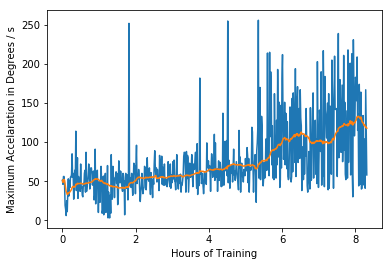

In [91]:
plt.plot(timestep / 60**2, rewards *100)
plt.plot(timestep / 60**2, smoothed_rewards *100)
plt.xlabel('Hours of Training')
plt.ylabel('Maximum Accelaration in Degrees / s')
plt.savefig('./cma_results/rewards.pdf')
plt.show()

# best weights

In [65]:
rewards_weights = zip(rewards, weights)
rewards_weights = sorted(rewards_weights, key=lambda x: x[0], reverse=True)
rewards_weights[0]

(2.5600000000000001,
 array([ 14.32664285, -11.95811443,  -6.27011603,   1.2407833 ]))

# Cluster centers

In [75]:
dat = np.loadtxt('./cma_results/outcmaesxmean.dat', delimiter=' ', skiprows=1)
cma_iter = dat[:, 0]
f_eval = dat[:, 1]
cma_cluster_center = dat[:, 5:]

In [76]:
cma_cluster_center

array([[  1.03270955e+01,  -4.45169960e+00,  -1.10505820e+00,
         -4.16569372e-03],
       [  1.02773505e+01,  -4.98061245e+00,  -1.40237791e+00,
          5.29582527e-02],
       [  1.03908958e+01,  -4.77822859e+00,  -1.52019174e+00,
          6.52962746e-02],
       [  1.03900353e+01,  -5.12812925e+00,  -1.66288120e+00,
          5.05475475e-01],
       [  1.03038398e+01,  -5.88296293e+00,  -1.94505032e+00,
          4.89889957e-01],
       [  1.04239813e+01,  -6.03487789e+00,  -2.00222629e+00,
          6.52295756e-01],
       [  1.05359753e+01,  -5.35115737e+00,  -1.37606961e+00,
          5.69084433e-01],
       [  1.06195455e+01,  -4.77547655e+00,  -1.30497866e+00,
          6.17377611e-01],
       [  1.03367939e+01,  -4.27389684e+00,  -1.01027043e+00,
          8.06935208e-01],
       [  1.04974432e+01,  -3.76115578e+00,  -8.57282768e-01,
          8.24748264e-01],
       [  1.04461653e+01,  -3.84194884e+00,  -1.15761267e+00,
          7.86334144e-01],
       [  1.03474058e

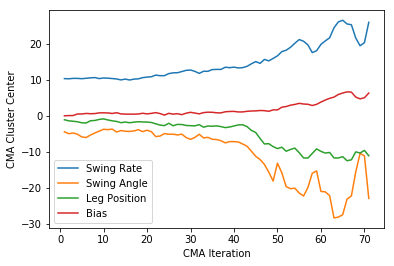

In [88]:
plt.plot(cma_iter, cma_cluster_center[:, 0],label='Swing Rate')
plt.plot(cma_iter, cma_cluster_center[:, 1],label='Swing Angle')
plt.plot(cma_iter, cma_cluster_center[:, 2],label='Leg Position')
plt.plot(cma_iter, cma_cluster_center[:, 3],label='Bias')
plt.legend()
plt.xlabel('CMA Iteration')
plt.ylabel('CMA Cluster Center')
plt.savefig('./cma_results/weights.pdf')
plt.show()